# Classification Model to Predict Bean Type based on multiple Predictor Variables
### Project Group 004-1
### Members: Maxwell Woodfield (19511435), Flora Hang (27784818)

## Introduction:

This classification model aims to predict the type of bean based on multiple predictor variables such as area, perimeter, major axis length, minor axis length, aspect ratio, as well as other discusses below. For this model, we will be utilizing the UC Irvine dry bean dataset found here:
https://archive.ics.uci.edu/dataset/602/dry+bean+dataset. From the Dry Bean Dataset, our data analysis aims to develop a classification model for predicting the type of dry bean using 12 dimensions and 4 shape forms. To enhance the model's efficiency, we will initially reduce the number of variables, selecting those most relevant to our predictive question and those that maximize our models accuracy power. Subsequently, we will assess the dataset by dividing it into training and testing sets to optimize prediction accuracy and model performance. With the optimized K value, we will construct a model utilizing specific variables to predict bean types, supported by various visuals, such as accuracy versus neighbor count, under/overfitting plots, and assessments of irrelevant predictors.

The UC Irvine dry bean dataset contains 7 different classes for beans, and with the predictors given we attempt to accurately classify the bean with its correct class. This would allow for easier and more convenient classification for beans, which can be a tedious task if done manually.This analysis also contributes to enhancing our understanding of dry bean classification and potentially improving bean type prediction accuracy, which can be valuable for various applications, such as agriculture and food processing.

Here are the variables in this dataset:

*Area-The area of a bean zone and the number of pixels within its boundaries.

*Perimeter-Bean circumference is defined as the length of its border.

*MajorAxisLength-The distance between the ends of the longest line that can be drawn from a bean.

*MinorAxisLength-The longest line that can be drawn from the bean while standing perpendicular to the main axis.

*AspectRatio-Defines the relationship between MajorAxisLength and MinorAxisLength.

*Eccentricity-Eccentricity of the ellipse having the same moments as the region.

*ConvexArea-Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

*EquivDiameter-Equivalent diameter: The diameter of a circle having the same area as a bean seed area.

*Extent-The ratio of the pixels in the bounding box to the bean area.

*Solidity-Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

*Roundness-Calculated with the following formula: $\frac{4\pi A}{P^2}$

*Compactness-Measures the roundness of an object: $\frac{Ed}{L}$


# Methods and Results:

To begin this project, we first install and load in the necessary libraries needed for our data analysis. This set also includes loading in the data file, from our github page into Jupyter seen in the second cell below.

In [6]:
#Possible packages necessary to install:
install.packages('psych')
install.packages('tidyverse')
install.packages('tidymodels')
install.packages('purrr')
install.packages('readxl')
install.packages('RCurl')
install.packages('ggplot2')
install.packages('kknn')
install.packages('gridExtra')
install.packages('dplyr')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [17]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)
library(readxl)
library(RCurl)
library(ggplot2)
library(gridExtra)

ERROR: Error: package or namespace load failed for ‘purrr’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 1.1.0 is already loaded, but >= 1.1.1 is required


### Loading Data from GitHub

In [51]:
url <- "https://raw.githubusercontent.com/saucemmmm/DSCIProject2/main/Dry_Bean_Dataset.csv"
bean_data_unscaled <- read_csv(url)

glimpse(bean_data_unscaled)


Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (16): Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 13,611
Columns: 17
$ Area            <dbl> 28395, 28734, 29380, 30008, 30140, 30279, 30477, 30519…
$ Perimeter       <dbl> 610.291, 638.018, 624.110, 645.884, 620.134, 634.927, …
$ MajorAxisLength <dbl> 208.1781, 200.5248, 212.8261, 210.5580, 201.8479, 212.…
$ MinorAxisLength <dbl> 173.8887, 182.7344, 175.9311, 182.5165, 190.2793, 181.…
$ AspectRation    <dbl> 1.197191, 1.097356, 1.209713, 1.153638, 1.060798, 1.17…
$ Eccentricity    <dbl> 0.5498122, 0.4117853, 0.5627273, 0.4986160, 0.3336797,…
$ ConvexArea      <dbl> 28715, 29172, 29690, 30724, 30417, 30600, 30970, 30847…
$ EquivDiameter   <dbl> 190.1411, 191.2728, 193.4109, 195.4671, 195.8965, 196.…
$ Extent          <dbl> 0.7639225, 0.7839681, 0.7781132, 0.7826813, 0.7730980,…
$ Solidity        <dbl> 0.9888560, 0.9849856, 0.9895588, 0.9766957, 0.9908932,…
$ roundness       <dbl> 0.9580271, 0.8870336, 0.9478495, 0.9039364, 0.9848771,…
$ Compactness     <dbl> 0.9133578, 0.9538608, 0.9087742, 0.9283288, 0.9705155,…
$ ShapeFactor1 

The above cell shows a glimpse of the data used in this classification analysis with 16 total columns related to the specific values associated with each bean and the final column being the class of bean denoted as seven types seen below.

We then display the different Class types of beans, which has 7 different types seen below and are then changed from a character type to a factor in order to be used in the classification model.

In [52]:
bean_class<-
bean_data_unscaled|>distinct(Class)
bean_class

Class
<chr>
SEKER
BARBUNYA
BOMBAY
CALI
HOROZ
SIRA
DERMASON


In [54]:
bean_data_unscaled<- bean_data_unscaled|>
    mutate(Class = as_factor(Class))


### Summary of Predictor Variables Based on Class Type

Below is the summary statistics of each of the seven class variables which include: column number, number of cases, the mean value, the median value, the trimmed mean, the median absolute deviation, the minimum value, the maximum value, the range of values, the skewness, the kurtosis and the standard error.

In [66]:
library(psych)
group <- bean_data_unscaled |>
    filter(Class == 'SEKER') |>
    select(-Class)
describe(group)
group1 <- bean_data_unscaled |>
    filter(Class == 'BARBUNYA') |>
    select(-Class)
describe(group1)
group2 <- bean_data_unscaled |>
    filter(Class == 'BOMBAY') |>
    select(-Class)
describe(group2)
group3 <- bean_data_unscaled |>
    filter(Class == 'CALI') |>
    select(-Class)
describe(group3)
group4 <- bean_data_unscaled |>
    filter(Class == 'HOROZ') |>
    select(-Class)
describe(group4)
group5 <- bean_data_unscaled |>
    filter(Class == 'SIRA') |>
    select(-Class)
describe(group5)
group6 <- bean_data_unscaled |>
    filter(Class == 'DERMASON') |>
    select(-Class)
describe(group6)

    

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,2027,3.988130e+04,4.779877e+03,3.918000e+04,3.954433e+04,4.547134e+03,2.839500e+04,6.115000e+04,3.275500e+04,0.7413665,0.69125457,1.061671e+02
Perimeter,2,2027,7.276724e+02,4.784901e+01,7.212920e+02,7.240346e+02,4.488571e+01,6.102910e+02,9.333720e+02,3.230810e+02,0.8104747,0.95301501,1.062787e+00
MajorAxisLength,3,2027,2.512920e+02,1.996950e+01,2.491520e+02,2.500238e+02,1.877522e+01,2.005248e+02,3.399315e+02,1.394067e+02,0.7691905,1.17472387,4.435478e-01
MinorAxisLength,4,2027,2.019097e+02,1.094280e+01,2.004328e+02,2.012406e+02,1.083832e+01,1.712106e+02,2.522876e+02,8.107709e+01,0.6255200,0.45411099,2.430533e-01
AspectRation,5,2027,1.245182e+00,8.222316e-02,1.236241e+00,1.239689e+00,6.928402e-02,1.024868e+00,1.679979e+00,6.551111e-01,0.9687638,2.47280571,1.826280e-03
Eccentricity,6,2027,5.847812e-01,7.126458e-02,5.879409e-01,5.869729e-01,6.436050e-02,2.189513e-01,8.035438e-01,5.845925e-01,-0.4632993,1.38991637,1.582876e-03
ConvexArea,7,2027,4.026957e+04,4.823867e+03,3.953900e+04,3.992594e+04,4.563443e+03,2.871500e+04,6.164000e+04,3.292500e+04,0.7510276,0.70811245,1.071441e+02
EquivDiameter,8,2027,2.249484e+02,1.329415e+01,2.233507e+02,2.242158e+02,1.303563e+01,1.901411e+02,2.790315e+02,8.889044e+01,0.5644082,0.31669270,2.952797e-01
Extent,9,2027,7.716743e-01,1.882761e-02,7.742018e-01,7.727479e-01,1.791852e-02,6.718709e-01,8.261041e-01,1.542332e-01,-0.7422012,1.39931326,4.181849e-04


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,1322,6.980413e+04,1.026539e+04,6.958200e+04,6.966790e+04,9.952694e+03,4.148700e+04,1.159670e+05,7.448000e+04,0.184677324,0.31448977,2.823317e+02
Perimeter,2,1322,1.046106e+03,8.962965e+01,1.045060e+03,1.045653e+03,8.474245e+01,7.595520e+02,1.359763e+03,6.002110e+02,0.070235958,0.16979830,2.465108e+00
MajorAxisLength,3,1322,3.700443e+02,3.226281e+01,3.696300e+02,3.701470e+02,3.247840e+01,2.667004e+02,4.836913e+02,2.169909e+02,-0.009127933,0.05613751,8.873327e-01
MinorAxisLength,4,1322,2.403094e+02,1.984027e+01,2.397218e+02,2.400498e+02,1.917982e+01,1.770815e+02,3.313053e+02,1.542238e+02,0.167745539,0.15482064,5.456723e-01
AspectRation,5,1322,1.544395e+00,1.260574e-01,1.547761e+00,1.545524e+00,1.246045e-01,1.135792e+00,1.950371e+00,8.145789e-01,-0.048055979,0.01764622,3.466991e-03
Eccentricity,6,1322,7.546646e-01,5.010506e-02,7.632572e-01,7.594050e-01,4.318536e-02,4.741519e-01,8.585541e-01,3.844021e-01,-1.134128404,2.37654162,1.378053e-03
ConvexArea,7,1322,7.102573e+04,1.044525e+04,7.080200e+04,7.088186e+04,1.007649e+04,4.200500e+04,1.184970e+05,7.649200e+04,0.190652331,0.32842487,2.872786e+02
EquivDiameter,8,1322,2.973110e+02,2.199790e+01,2.976484e+02,2.975015e+02,2.134857e+01,2.298323e+02,3.842574e+02,1.544251e+02,-0.061845088,0.21043003,6.050141e-01
Extent,9,1322,7.492727e-01,4.043895e-02,7.507011e-01,7.498211e-01,4.929250e-02,6.397873e-01,8.405769e-01,2.007896e-01,-0.101733980,-0.89084773,1.112203e-03


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,522,1.734851e+05,2.332769e+04,1.714945e+05,1.725090e+05,2.226791e+04,1.140040e+05,2.546160e+05,1.406120e+05,0.44878908,0.204570638,1.021025e+03
Perimeter,2,522,1.585619e+03,1.159010e+02,1.586237e+03,1.583156e+03,1.144530e+02,1.265926e+03,1.985370e+03,7.194440e+02,0.22200899,-0.010971200,5.072847e+00
MajorAxisLength,3,522,5.931521e+02,5.319670e+01,5.906756e+02,5.923492e+02,5.611912e+01,4.259238e+02,7.388602e+02,3.129364e+02,0.09642679,-0.234169352,2.328356e+00
MinorAxisLength,4,522,3.743525e+02,2.329931e+01,3.716487e+02,3.729968e+02,2.291908e+01,3.237480e+02,4.601985e+02,1.364505e+02,0.58267004,0.353458750,1.019783e+00
AspectRation,5,522,1.585550e+00,1.188320e-01,1.586342e+00,1.583873e+00,1.166285e-01,1.212715e+00,1.933856e+00,7.211413e-01,0.07666359,-0.002864672,5.201136e-03
Eccentricity,6,522,7.705182e-01,4.117518e-02,7.762857e-01,7.731613e-01,3.681530e-02,5.657219e-01,8.559241e-01,2.902022e-01,-0.88753175,1.789824512,1.802189e-03
ConvexArea,7,522,1.758131e+05,2.382325e+04,1.735865e+05,1.747921e+05,2.289431e+04,1.152980e+05,2.632610e+05,1.479630e+05,0.46126288,0.261536365,1.042715e+03
EquivDiameter,8,522,4.689414e+02,3.136657e+01,4.672832e+02,4.681989e+02,3.015005e+01,3.809913e+02,5.693744e+02,1.883830e+02,0.25575349,-0.012328416,1.372877e+00
Extent,9,522,7.765589e-01,3.880929e-02,7.837771e-01,7.800424e-01,3.558010e-02,6.070210e-01,8.584198e-01,2.513988e-01,-0.87965095,0.829580679,1.698637e-03


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,1630,7.553821e+04,9.379881e+03,7.479150e+04,7.517670e+04,8.974919e+03,4.550400e+04,1.162720e+05,7.076800e+04,0.447335670,0.7622159,2.323291e+02
Perimeter,2,1630,1.057634e+03,6.761514e+01,1.055472e+03,1.056437e+03,6.232628e+01,7.897700e+02,1.326583e+03,5.368130e+02,0.157577501,0.6272941,1.674751e+00
MajorAxisLength,3,1630,4.094995e+02,2.950847e+01,4.087832e+02,4.093638e+02,2.780437e+01,2.748634e+02,5.344844e+02,2.596210e+02,0.007021309,0.6851754,7.308914e-01
MinorAxisLength,4,1630,2.363706e+02,1.467024e+01,2.354109e+02,2.359458e+02,1.337766e+01,1.798347e+02,2.968988e+02,1.170641e+02,0.288936044,0.5815505,3.633654e-01
AspectRation,5,1630,1.733663e+00,9.150106e-02,1.733901e+00,1.734153e+00,8.831615e-02,1.297228e+00,2.008074e+00,7.108456e-01,-0.148116975,0.6335801,2.266378e-03
Eccentricity,6,1630,8.148044e-01,2.284131e-02,8.169319e-01,8.161808e-01,2.051296e-02,6.369871e-01,8.671830e-01,2.301958e-01,-1.102251789,4.2440733,5.657535e-04
ConvexArea,7,1630,7.668850e+04,9.522533e+03,7.596150e+04,7.632342e+04,9.009760e+03,4.597200e+04,1.181440e+05,7.217200e+04,0.442814427,0.7655288,2.358624e+02
EquivDiameter,8,1630,3.095353e+02,1.914086e+01,3.085895e+02,3.091478e+02,1.846445e+01,2.407021e+02,3.847624e+02,1.440603e+02,0.216007011,0.5526551,4.740974e-01
Extent,9,1630,7.589531e-01,4.197508e-02,7.658614e-01,7.622275e-01,4.357015e-02,6.294058e-01,8.502513e-01,2.208455e-01,-0.611121127,-0.3207687,1.039675e-03


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,1928,5.364851e+04,7.341398e+03,5.380050e+04,5.373442e+04,7.175043e+03,3.300600e+04,8.192900e+04,4.892300e+04,-0.07185000,0.08631507,1.671958e+02
Perimeter,2,1928,9.198597e+02,7.004593e+01,9.213955e+02,9.218094e+02,6.539230e+01,6.892940e+02,1.162588e+03,4.732940e+02,-0.24349226,0.48554593,1.595252e+00
MajorAxisLength,3,1928,3.725703e+02,3.022012e+01,3.743656e+02,3.739169e+02,2.630521e+01,2.646307e+02,4.567582e+02,1.921274e+02,-0.48130622,0.66881259,6.882444e-01
MinorAxisLength,4,1928,1.841707e+02,1.348167e+01,1.838369e+02,1.840810e+02,1.368292e+01,1.481675e+02,2.378999e+02,8.973246e+01,0.15151254,0.02954213,3.070367e-01
AspectRation,5,1928,2.026119e+00,1.353595e-01,2.036556e+00,2.032067e+00,1.251424e-01,1.462019e+00,2.430306e+00,9.682873e-01,-0.47830706,0.66816615,3.082728e-03
Eccentricity,6,1928,8.674431e-01,2.106678e-02,8.711455e-01,8.697115e-01,1.697979e-02,7.294956e-01,9.114230e-01,1.819274e-01,-1.50557557,4.27102839,4.797828e-04
ConvexArea,7,1928,5.444009e+04,7.452626e+03,5.458150e+04,5.452384e+04,7.314407e+03,3.335400e+04,8.301900e+04,4.966500e+04,-0.06518705,0.08867941,1.697289e+02
EquivDiameter,8,1928,2.607307e+02,1.808500e+01,2.617268e+02,2.613104e+02,1.751687e+01,2.049989e+02,3.229787e+02,1.179798e+02,-0.29118335,0.18133487,4.118745e-01
Extent,9,1928,7.063927e-01,7.528162e-02,7.039825e-01,7.060860e-01,1.047722e-01,5.553147e-01,8.661946e-01,3.108799e-01,0.05602820,-1.31484331,1.714492e-03


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,2636,4.472913e+04,4.546770e+03,4.459300e+04,4.467015e+04,4.562702e+03,3.151900e+04,6.361200e+04,3.209300e+04,0.15656517,-0.06424125,8.855850e+01
Perimeter,2,2636,7.964187e+02,4.437708e+01,7.949895e+02,7.959795e+02,4.381305e+01,6.681060e+02,9.842820e+02,3.161760e+02,0.14247389,0.09537853,8.643429e-01
MajorAxisLength,3,2636,2.993803e+02,2.076618e+01,2.985864e+02,2.989547e+02,2.047094e+01,2.338050e+02,4.009315e+02,1.671265e+02,0.25748093,0.27994404,4.044678e-01
MinorAxisLength,4,2636,1.908002e+02,9.156833e+00,1.909352e+02,1.909348e+02,8.972743e+00,1.578027e+02,2.247293e+02,6.692657e+01,-0.13147445,0.02258592,1.783498e-01
AspectRation,5,2636,1.570083e+00,9.660013e-02,1.562383e+00,1.566714e+00,9.162220e-02,1.259251e+00,2.006989e+00,7.477381e-01,0.36687125,0.36935568,1.881503e-03
Eccentricity,6,2636,7.672773e-01,3.276447e-02,7.683348e-01,7.682536e-01,3.180499e-02,6.077571e-01,8.670283e-01,2.592712e-01,-0.39226775,0.61847356,6.381613e-04
ConvexArea,7,2636,4.527310e+04,4.595497e+03,4.516050e+04,4.521011e+04,4.572338e+03,3.206500e+04,6.458100e+04,3.251600e+04,0.16559299,-0.05078574,8.950757e+01
EquivDiameter,8,2636,2.383353e+02,1.213377e+01,2.382804e+02,2.383491e+02,1.217860e+01,2.003278e+02,2.845932e+02,8.426542e+01,0.01201813,-0.10884845,2.363323e-01
Extent,9,2636,7.494447e-01,4.444476e-02,7.525305e-01,7.504720e-01,5.784024e-02,6.275272e-01,8.353266e-01,2.077994e-01,-0.16433835,-1.13127953,8.656611e-04


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,3546,3.211871e+04,4.676129e+03,3.189000e+04,3.206986e+04,5.222458e+03,2.042000e+04,4.215900e+04,2.173900e+04,0.07831268,-0.7292567,7.852667e+01
Perimeter,2,3546,6.652095e+02,5.046751e+01,6.645230e+02,6.653868e+02,5.515198e+01,5.247360e+02,9.082650e+02,3.835290e+02,-0.02073554,-0.4785471,8.475054e-01
MajorAxisLength,3,3546,2.465573e+02,2.066423e+01,2.465458e+02,2.465772e+02,2.185617e+01,1.836012e+02,3.082623e+02,1.246612e+02,-0.01821225,-0.3620613,3.470163e-01
MinorAxisLength,4,3546,1.656571e+02,1.254993e+01,1.657615e+02,1.656996e+02,1.373788e+01,1.225127e+02,2.050986e+02,8.258591e+01,-0.02317887,-0.5063733,2.107521e-01
AspectRation,5,3546,1.490471e+00,9.637303e-02,1.484704e+00,1.487834e+00,9.161791e-02,1.188088e+00,2.010000e+00,8.219119e-01,0.35466871,0.6584274,1.618401e-03
Eccentricity,6,3546,7.366322e-01,4.027042e-02,7.391555e-01,7.384304e-01,3.790192e-02,5.399636e-01,8.674569e-01,3.274932e-01,-0.54332668,0.9276671,6.762647e-04
ConvexArea,7,3546,3.249844e+04,4.710754e+03,3.227150e+04,3.244922e+04,5.220235e+03,2.068400e+04,4.266800e+04,2.198400e+04,0.07765846,-0.7292133,7.910811e+01
EquivDiameter,8,3546,2.016838e+02,1.478222e+01,2.015034e+02,2.017882e+02,1.640958e+01,1.612438e+02,2.316862e+02,7.044246e+01,-0.06446665,-0.6870599,2.482392e-01
Extent,9,3546,7.529531e-01,3.749882e-02,7.539316e-01,7.533879e-01,4.710335e-02,6.528805e-01,8.528414e-01,1.999609e-01,-0.08616490,-0.9616145,6.297211e-04


## ^ Summary data of bean types: SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, DERMASON (respectively)

Below we take a random sample of 50% of the data which will be used to conduct the classification due to the large size of the data. We should expect the mean and standard deviation to be roughly the same with half the data due to the large size of the dataset. To test this we can compare the values from the random sample and the original summary statistics which is shown below this random sample.

In [5]:
set.seed(1)
sample_size <- round(0.5 * nrow(bean_data_unscaled))
random_sample <- bean_data_unscaled[sample(nrow(bean_data_unscaled), sample_size), ]
glimpse(random_sample)

Rows: 6,806
Columns: 17
$ Area            <dbl> 39192, 41191, 75990, 25765, 38374, 49946, 35742, 26707…
$ Perimeter       <dbl> 709.658, 776.063, 1047.960, 593.281, 742.778, 836.653,…
$ MajorAxisLength <dbl> 242.1603, 282.0423, 409.9497, 220.5953, 272.2549, 309.…
$ MinorAxisLength <dbl> 206.3863, 186.4416, 237.5924, 149.0794, 180.2853, 205.…
$ AspectRation    <dbl> 1.173336, 1.512765, 1.725432, 1.479717, 1.510134, 1.50…
$ Eccentricity    <dbl> 0.5231003, 0.7503496, 0.8149261, 0.7370804, 0.7493335,…
$ ConvexArea      <dbl> 39464, 41770, 76906, 26038, 38852, 50482, 36323, 26985…
$ EquivDiameter   <dbl> 223.3849, 229.0109, 311.0522, 181.1216, 221.0414, 252.…
$ Extent          <dbl> 0.7829787, 0.7909178, 0.6974439, 0.7074992, 0.7164408,…
$ Solidity        <dbl> 0.9931076, 0.9861384, 0.9880894, 0.9895153, 0.9876969,…
$ roundness       <dbl> 0.9779330, 0.8594453, 0.8695146, 0.9198545, 0.8740351,…
$ Compactness     <dbl> 0.9224669, 0.8119737, 0.7587570, 0.8210580, 0.8118912,…
$ ShapeFactor1  

In [68]:
group <- random_sample |>
    filter(Class == 'SEKER') |>
    select(-Class)
describe(group)
group <- bean_data_unscaled |>
    filter(Class == 'SEKER') |>
    select(-Class)
describe(group)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,1038,3.986673e+04,4.831442e+03,3.907950e+04,3.952902e+04,4.675379e+03,2.873400e+04,5.799400e+04,2.926000e+04,0.7166257,0.45614013,1.499609e+02
Perimeter,2,1038,7.270902e+02,4.818928e+01,7.193035e+02,7.234383e+02,4.542464e+01,6.201340e+02,9.257310e+02,3.055970e+02,0.7992274,0.80864096,1.495725e+00
MajorAxisLength,3,1038,2.510157e+02,2.009068e+01,2.486931e+02,2.497244e+02,1.901382e+01,2.005248e+02,3.399315e+02,1.394067e+02,0.7744843,1.18140589,6.235856e-01
MinorAxisLength,4,1038,2.020299e+02,1.101424e+01,2.002900e+02,2.013573e+02,1.108030e+01,1.755104e+02,2.419587e+02,6.644827e+01,0.5678032,0.01792729,3.418659e-01
AspectRation,5,1038,1.242993e+00,8.133370e-02,1.233731e+00,1.236937e+00,6.989046e-02,1.041964e+00,1.648373e+00,6.064093e-01,0.9862845,2.27897370,2.524480e-03
Eccentricity,6,1038,5.830952e-01,7.013248e-02,5.856706e-01,5.844255e-01,6.462952e-02,2.809366e-01,7.949623e-01,5.140257e-01,-0.3080484,0.88324295,2.176810e-03
ConvexArea,7,1038,4.025057e+04,4.875770e+03,3.941950e+04,3.990591e+04,4.752474e+03,2.917200e+04,5.846100e+04,2.928900e+04,0.7241584,0.46204710,1.513368e+02
EquivDiameter,8,1038,2.248985e+02,1.344324e+01,2.230640e+02,2.241616e+02,1.337549e+01,1.912728e+02,2.717356e+02,8.046288e+01,0.5526484,0.14032987,4.172586e-01
Extent,9,1038,7.714750e-01,1.875698e-02,7.740271e-01,7.725263e-01,1.792372e-02,6.718709e-01,8.239707e-01,1.520998e-01,-0.7992902,1.81575503,5.821894e-04


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Area,1,2027,3.988130e+04,4.779877e+03,3.918000e+04,3.954433e+04,4.547134e+03,2.839500e+04,6.115000e+04,3.275500e+04,0.7413665,0.69125457,1.061671e+02
Perimeter,2,2027,7.276724e+02,4.784901e+01,7.212920e+02,7.240346e+02,4.488571e+01,6.102910e+02,9.333720e+02,3.230810e+02,0.8104747,0.95301501,1.062787e+00
MajorAxisLength,3,2027,2.512920e+02,1.996950e+01,2.491520e+02,2.500238e+02,1.877522e+01,2.005248e+02,3.399315e+02,1.394067e+02,0.7691905,1.17472387,4.435478e-01
MinorAxisLength,4,2027,2.019097e+02,1.094280e+01,2.004328e+02,2.012406e+02,1.083832e+01,1.712106e+02,2.522876e+02,8.107709e+01,0.6255200,0.45411099,2.430533e-01
AspectRation,5,2027,1.245182e+00,8.222316e-02,1.236241e+00,1.239689e+00,6.928402e-02,1.024868e+00,1.679979e+00,6.551111e-01,0.9687638,2.47280571,1.826280e-03
Eccentricity,6,2027,5.847812e-01,7.126458e-02,5.879409e-01,5.869729e-01,6.436050e-02,2.189513e-01,8.035438e-01,5.845925e-01,-0.4632993,1.38991637,1.582876e-03
ConvexArea,7,2027,4.026957e+04,4.823867e+03,3.953900e+04,3.992594e+04,4.563443e+03,2.871500e+04,6.164000e+04,3.292500e+04,0.7510276,0.70811245,1.071441e+02
EquivDiameter,8,2027,2.249484e+02,1.329415e+01,2.233507e+02,2.242158e+02,1.303563e+01,1.901411e+02,2.790315e+02,8.889044e+01,0.5644082,0.31669270,2.952797e-01
Extent,9,2027,7.716743e-01,1.882761e-02,7.742018e-01,7.727479e-01,1.791852e-02,6.718709e-01,8.261041e-01,1.542332e-01,-0.7422012,1.39931326,4.181849e-04


In [8]:
num_obs<-nrow(bean_train)
num_type_train<-
bean_train|>
group_by(Class) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)
num_type_train

Class,count,percentage
<fct>,<int>,<dbl>
SEKER,769,15.066614
BARBUNYA,494,9.678683
BOMBAY,203,3.977273
CALI,591,11.579154
HOROZ,711,13.930251
SIRA,979,19.181034
DERMASON,1357,26.586991


We then create the training and testing set from the data, which uses a 75% to 25% ratio of training to testing set. Because are classification model attempts to maximize accuracy we choose this training to testing ratio in order to balance the number of values being used to test the trained classifier and those used in the training model. We could have choosen a higher testing ratio because we have a large set of data, but because we had to take a random sample of 50% of these, using the standard 75% ratio is ideal.

In [6]:
bean_split <- initial_split(random_sample, prop = 0.75, strata = Class)  
bean_train <- training(bean_split)   
bean_test <- testing(bean_split)
glimpse(bean_train)

Rows: 5,104
Columns: 17
$ Area            <dbl> 75990, 64930, 80946, 74382, 70136, 90988, 103602, 7779…
$ Perimeter       <dbl> 1047.960, 990.342, 1093.510, 1073.257, 1030.908, 1150.…
$ MajorAxisLength <dbl> 409.9497, 377.2082, 422.8378, 413.3196, 396.6159, 448.…
$ MinorAxisLength <dbl> 237.5924, 220.6749, 245.3977, 230.4794, 226.0339, 259.…
$ AspectRation    <dbl> 1.725432, 1.709339, 1.723072, 1.793304, 1.754675, 1.72…
$ Eccentricity    <dbl> 0.8149261, 0.8110179, 0.8143608, 0.8300896, 0.8217097,…
$ ConvexArea      <dbl> 76906, 65973, 81704, 75387, 70887, 91581, 104732, 7974…
$ EquivDiameter   <dbl> 311.0522, 287.5264, 321.0353, 307.7436, 298.8309, 340.…
$ Extent          <dbl> 0.6974439, 0.7452938, 0.6782805, 0.7911548, 0.7705051,…
$ Solidity        <dbl> 0.9880894, 0.9841905, 0.9907226, 0.9866688, 0.9894057,…
$ roundness       <dbl> 0.8695146, 0.8319263, 0.8506673, 0.8114659, 0.8292988,…
$ Compactness     <dbl> 0.7587570, 0.7622485, 0.7592398, 0.7445657, 0.7534517,…
$ ShapeFactor1  

### Visualization of the Predictor variables

In order to descipher which predictor variables are ideal to use in our model, we first look at the distribution of the histogram of the predictor variables by class and choose the predictors which have different distribution. This visualization is helpful in reducing the number of predictors utilizied in our model, as due to the size of the data, makes any large number of predictors difficult to run in a small amount of time. Based on each of the predictors histogram, we can identify which histograms have a different distribution and use these to increase our models classification power. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

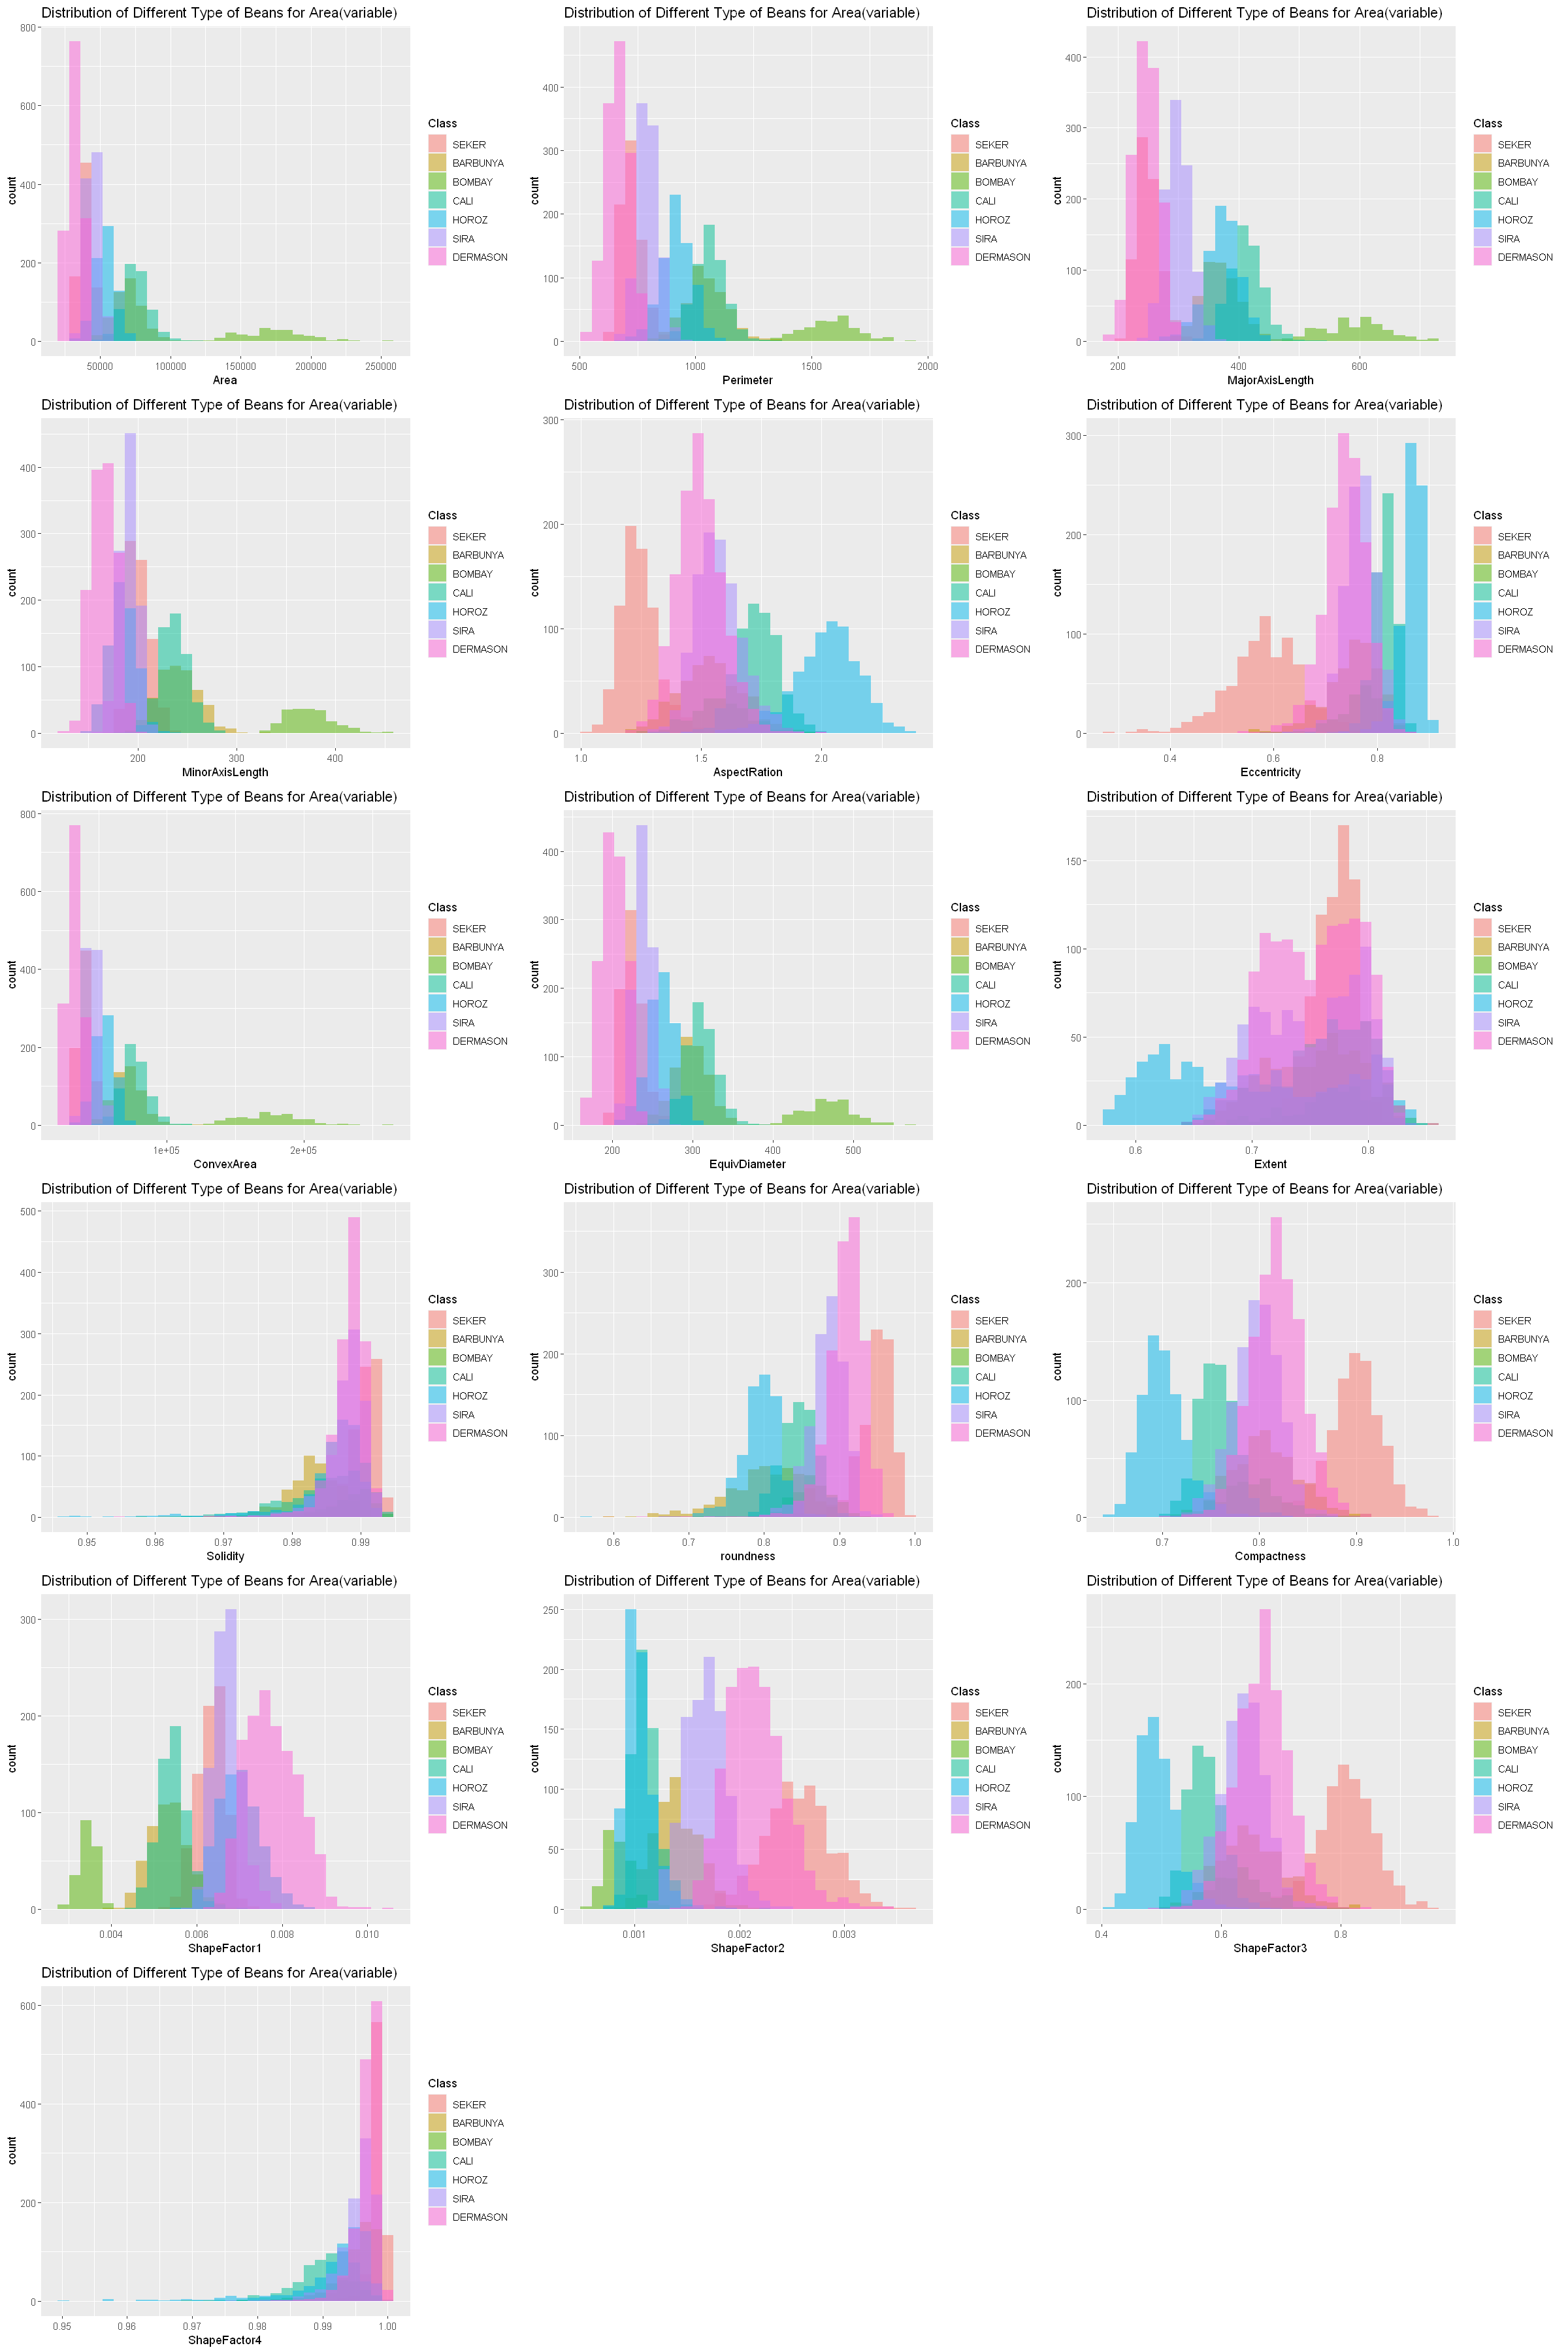

In [70]:
options(repr.plot.height = 10, repr.plot.width = 10)


predictor_distibution_plots<-
ggplot(bean_train, aes(x = Area , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots2<-
ggplot(bean_train, aes(x = Perimeter , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)") 

predictor_distibution_plots3<-
ggplot(bean_train, aes(x = MajorAxisLength , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots4<-
ggplot(bean_train, aes(x = MinorAxisLength , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots5<-
ggplot(bean_train, aes(x = AspectRation , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots6<-
ggplot(bean_train, aes(x = Eccentricity , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots7<-
ggplot(bean_train, aes(x = ConvexArea , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots8<-
ggplot(bean_train, aes(x = EquivDiameter , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots9<-
ggplot(bean_train, aes(x = Extent , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots10<-
ggplot(bean_train, aes(x = Solidity , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots11<-
ggplot(bean_train, aes(x = roundness , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots12<-
ggplot(bean_train, aes(x = Compactness , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots13<-
ggplot(bean_train, aes(x = ShapeFactor1 , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots14<-
ggplot(bean_train, aes(x = ShapeFactor2 , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots15<-
ggplot(bean_train, aes(x = ShapeFactor3 , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")

predictor_distibution_plots16<-
ggplot(bean_train, aes(x = ShapeFactor4 , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")


plots_list <- list(
  predictor_distibution_plots,
  predictor_distibution_plots2,
  predictor_distibution_plots3,
  predictor_distibution_plots4,
  predictor_distibution_plots5,
  predictor_distibution_plots6,
  predictor_distibution_plots7,
  predictor_distibution_plots8,
  predictor_distibution_plots9,
  predictor_distibution_plots10,
  predictor_distibution_plots11,
  predictor_distibution_plots12,
  predictor_distibution_plots13,
  predictor_distibution_plots14,
  predictor_distibution_plots15,
  predictor_distibution_plots16
)


facet_wrap_plots <- lapply(seq_along(plots_list), function(i) {
  plots_list[[i]] + facet_wrap(~i, scales = 'free_x')
})

options(repr.plot.height = 30, repr.plot.width = 20)

grid.arrange(grobs = plots_list, ncol = 3)

From the above plot, we utilize Perimeter, MajorAxisLength, AspectRation, Eccentricity, EquivDiameter, Extent, Compactness and ShapeFactor3 which have the most spread out distribution in their respective set and seem unique compared to the other distributions. By respective set, we mean predictors that have similar measures, for instance ShapeFactor has 4 types so we utilize the one which has the most spread distribution relative to class type (which is ShapeFactor3).   

To determine which of the predictors to use in order to maximize our classification model, we need to create a graph of the model accuracy estimates and the number of predictors seen below. Here we take a new random sample of the data of 1% in order to find which predictor variables to include. We use only 1% on the data for this part of the analysis due to the large size of the data and because we only wish to see which predictor variables to include in the model not exact accuracies, so even if the accuracies values are not exact they still allow use to determine which predictor variables to use.

In [21]:
set.seed(1)
sample_size <- round(0.01 * nrow(bean_data_unscaled))
random_sample1 <- bean_data_unscaled[sample(nrow(bean_data_unscaled), sample_size), ]

bean_split <- initial_split(random_sample1, prop = 0.75, strata = Class)  
bean_train1 <- training(bean_split)   
bean_test1 <- testing(bean_split)

bean_subset <- random_sample1 |>
    select(Class, Perimeter, MajorAxisLength, AspectRation, Eccentricity, EquivDiameter, Extent, Compactness, ShapeFactor3)
names <- colnames(bean_subset |> select(-Class))
    

In [4]:
knn_recipe<-recipe(Class~., data =bean_train)|>
            step_scale(all_predictors())|>
            step_center(all_predictors())
knn_spec0 <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit0 <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec0) |>
  fit(data = bean_train)

bean_predictions0 <- predict(knn_fit0, bean_test) |>
  bind_cols(bean_test)

bean_predictions0 |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")
bean_predictions0

ERROR: Error in step_center(step_scale(recipe(Class ~ ., data = bean_train), : could not find function "step_center"


In [22]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec1 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
bean0_vfold <- vfold_cv(bean_subset, v = 5, strata = Class)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        bean_recipe <- recipe(as.formula(model_string), 
                                data = bean_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(bean_recipe) |>
          add_model(knn_spec1) |>
          tune_grid(resamples = bean0_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

→ A | warning: No observations were detected in `truth` for level(s): 'BARBUNYA', 'BOMBAY'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: No observations were detected in `truth` for level(s): 'BARBUNYA'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

→ C | warning: No observations were detected in `truth` for level(s): 'BOMBAY'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1   B: x1
There were issues with some computations   A: x1   B: x1   C: x2



→ A | warning: No observations were detected in `truth` for level(s): 'BARBUNYA', 'BOMBAY'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

→ B | warning: No observations were detected in `truth` fo

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Class ~ Perimeter,0.6814872
2,Class ~ Perimeter+AspectRation,0.8507424
3,Class ~ Perimeter+AspectRation+EquivDiameter,0.8581929
4,Class ~ Perimeter+AspectRation+EquivDiameter+MajorAxisLength,0.8718860
5,Class ~ Perimeter+AspectRation+EquivDiameter+MajorAxisLength+ShapeFactor3,0.8435035
6,Class ~ Perimeter+AspectRation+EquivDiameter+MajorAxisLength+ShapeFactor3+Eccentricity,0.8301929
7,Class ~ Perimeter+AspectRation+EquivDiameter+MajorAxisLength+ShapeFactor3+Eccentricity+Compactness,0.8297167
8,Class ~ Perimeter+AspectRation+EquivDiameter+MajorAxisLength+ShapeFactor3+Eccentricity+Compactness+Extent,0.8145006


# ^Table of Accuracy Given Number of Neighbors

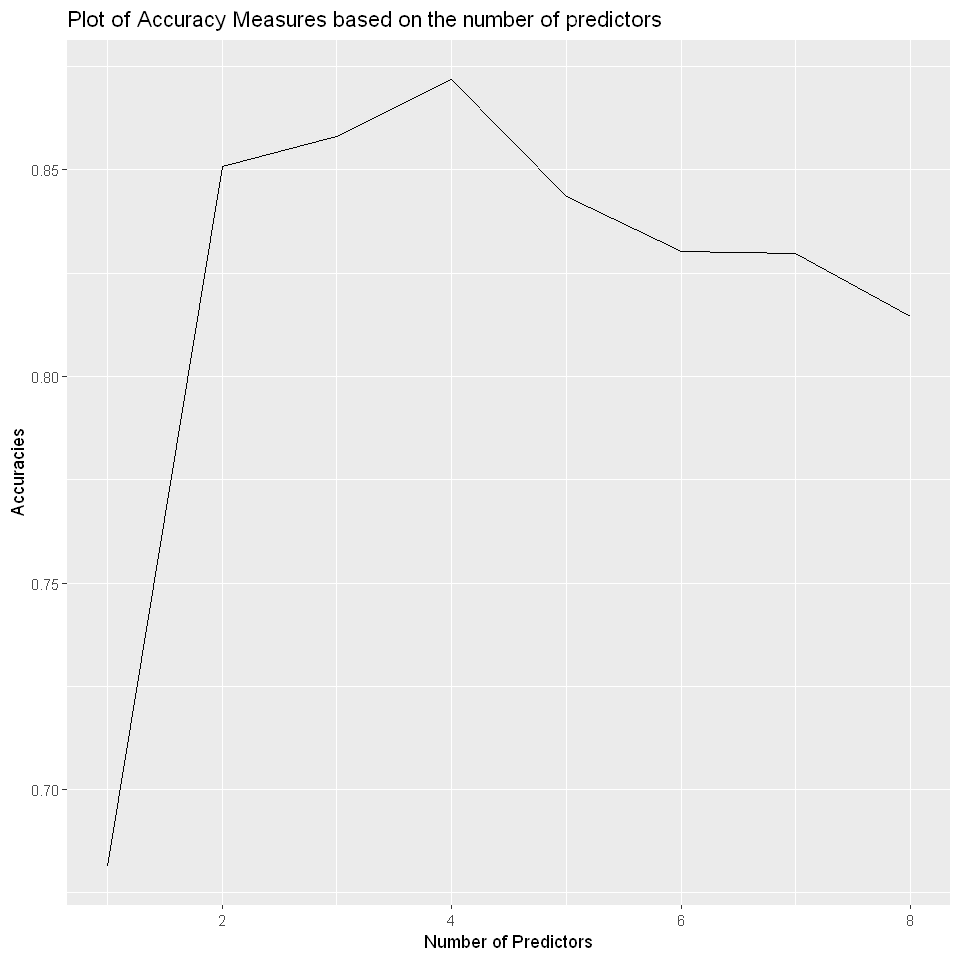

In [23]:
options(repr.plot.height = 8, repr.plot.width = 8)
plotaccuracies <- accuracies |>
    ggplot(aes(x = size, y = accuracy)) + geom_line() +xlab("Number of Predictors") + ylab("Accuracies") + ggtitle("Plot of Accuracy Measures based on the number of predictors")
plotaccuracies

# ^ Plot of Accuracy vs. Number of Neighbors

For the above plot and accuracies, we see that include 4 predictors gives the highest accuracy with a fairly large margine of about 2%. We then scale all the predictors and create a initall model using 3 neighbors in order to initially see what our model should look like. 

### Data Analysis

In [24]:
bean_recipe <- recipe(Class ~ Perimeter + AspectRation + EquivDiameter + MajorAxisLength, data = bean_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


In [25]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec) |>
  fit(data = bean_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1050157
Best kernel: rectangular
Best k: 3

In [26]:
bean_predictions <- predict(knn_fit, bean_test) |>
  bind_cols(bean_test)

bean_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8895417


We see that a model using the specified predictors and a k value of 3 gives a accuracy of roughly 0.89.

Then we create 5 folds measuring the accuracy of each of the different K nearest neighbors. This is done from 2 to 100 so that the graph shows the entire range of possible K values.

In [27]:
bean_vfold <- vfold_cv(bean_train, v = 5, strata = Class)
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 2, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec2) |>
  tune_grid(resamples = bean_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies1 <- knn_results |>
  filter(.metric == "accuracy")

accuracies1

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8802964,5,0.003212655,Preprocessor1_Model01
7,accuracy,multiclass,0.8994933,5,0.004303604,Preprocessor1_Model02
12,accuracy,multiclass,0.9002766,5,0.004235409,Preprocessor1_Model03
17,accuracy,multiclass,0.9006692,5,0.003321623,Preprocessor1_Model04
22,accuracy,multiclass,0.8992974,5,0.003752229,Preprocessor1_Model05
27,accuracy,multiclass,0.8971411,5,0.003475790,Preprocessor1_Model06
32,accuracy,multiclass,0.8959673,5,0.004372841,Preprocessor1_Model07
37,accuracy,multiclass,0.8969460,5,0.003990651,Preprocessor1_Model08
42,accuracy,multiclass,0.8959664,5,0.003292558,Preprocessor1_Model09


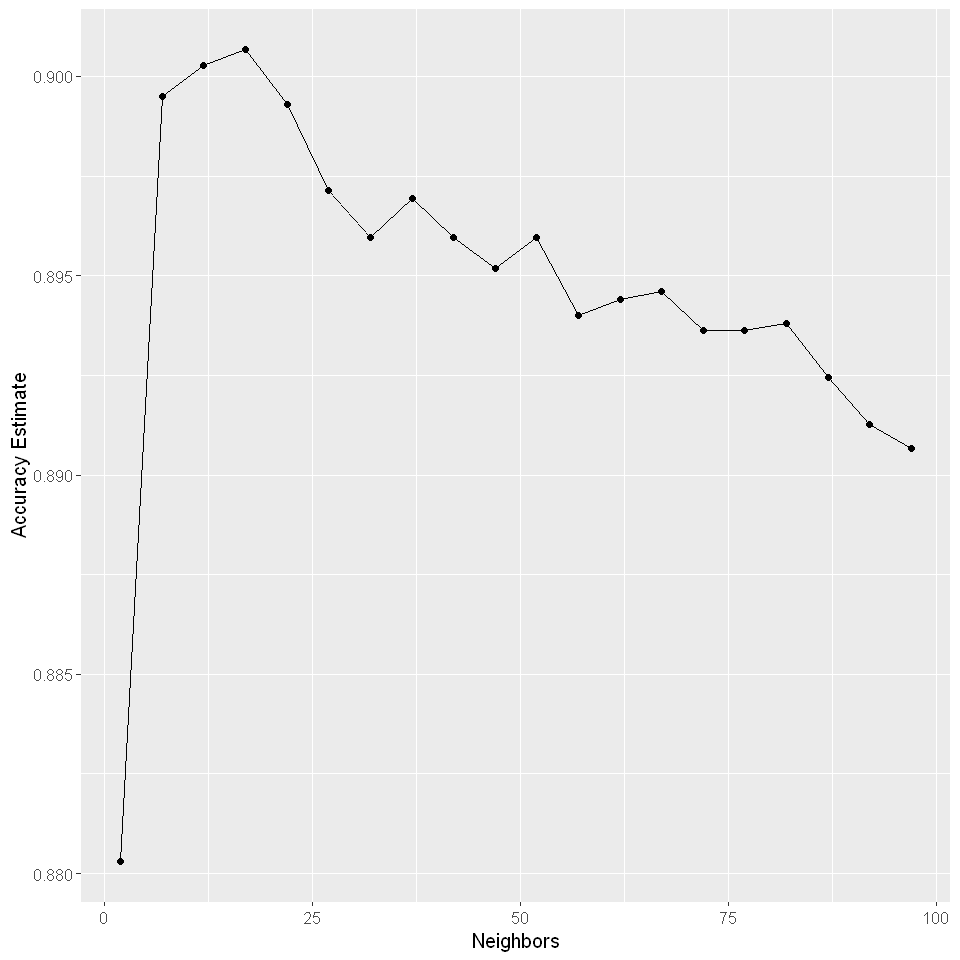

In [29]:
options(repr.plot.height = 8, repr.plot.width = 8)

accuracy_vs_k <- ggplot(accuracies1, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

# ^ Plot of Accuracy vs. Number of Neighbors

From the above plot we see the ideal neighbor values is roughly between k = 12 and k = 24, so we then create another plot of this range of k values to see which exact k value is ideal.

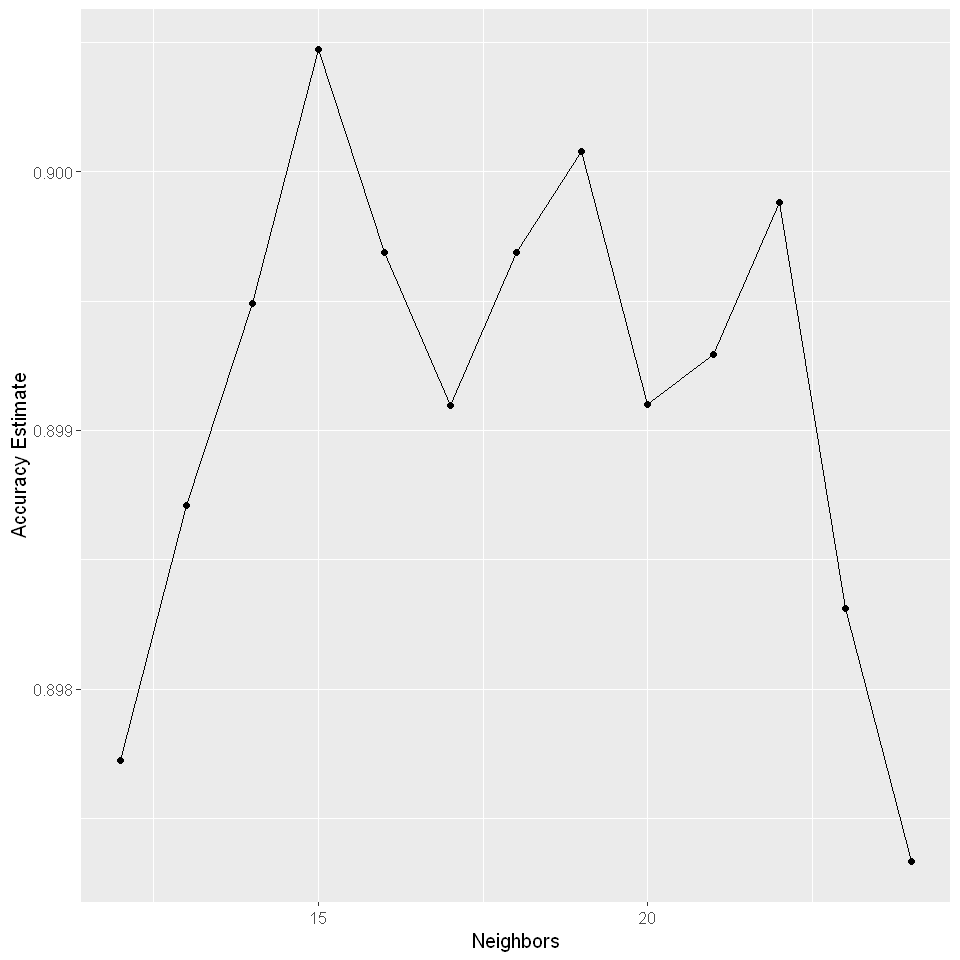

In [30]:
bean_vfold <- vfold_cv(bean_train, v = 5, strata = Class)
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 12, to = 24, by = 1))

knn_results <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec2) |>
  tune_grid(resamples = bean_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies2 <- knn_results |>
  filter(.metric == "accuracy")

options(repr.plot.height = 8, repr.plot.width = 8)

accuracy_vs_k <- ggplot(accuracies2, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

# ^ Plot of Accuracy vs. Number of Neighbors (zoomed in)

From the above accuract plot, we see that the neighbors K that maximize accuracy is at K = 15 so remaking the model with this value seen below gives the best accuaracy of 0.8942421.

In [31]:
knn_spec3 <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit3 <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec3) |>
  fit(data = bean_train)

bean_predictions3 <- predict(knn_fit3, bean_test) |>
  bind_cols(bean_test)

bean_predictions3 |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8942421


# Discussion
### 1. summarize what you found:
After the selection and reduction of predictors we got an accuracy level of 88.9%, but after tuning the k value, we were able to raise the accuracy level to 89.4%.
Through comparing accuracy of the model using a range of numbers of predictors we found accuracy ranging from 68.1% to 87.1% (seen in Table of Accuracy given Number of Predictors).

### 2. discuss whether this is what you expected to find?

The result was close to what we have expected. Initially, the amount of predictors this data set came was extremely abundant, and we all know that too many predictors isn't necessarily going to help with the accuracy of the model. However, it is still surprising how 4 predictors would give us the highest accuracy. The amount of neighbors we used to optimize the model's accuracy was just about what we have expected.

### 3. discuss what impact could such findings have?

The classification model could be very practical when implemented in an agricultural and food processing setting.  
##### 1. Sorting: 
The model could automate the sorting process of the agriculture industry, a process that is particularly useful when the same product needs to be sorted into different grades. Thus, increasing efficiency and reducing labor cost. 

##### 2. Quality Control: 

By having a machine with the classification model, quality control of products could be standardized. This is particularly crucial for industries that value consistency in their products.  

##### 3. Targeted marketing: 

The features used to classify these beans could be collected and further analyzed for marketing. Some beans have distinct features that make them suitable for specific purposes, such as different flavor profiles and textures. By possessing these data, companies could sell their beans to different customers based on their needs and the beans features. 

##### 4. Research and Development: 

The classification model could provide detailed information of the details of each type of beans which could be useful for crossbreeding for the desired traits.

### 4. discuss what future questions this could lead to? 

In the future as researchers gather more information about distinct species of beans and the process it takes to cultivate them many questions regarding the classifier's potential will come up. 

Such as: 

If in the future a mutation happened in one or more of the bean species, could this classifier identify the abnormality in the sorting process?  

How can the classifier be integrated into precision agriculture systems to optimize cultivation practices for different bean types? 

Can it provide insights into soil and environmental conditions that are optimal for specific bean varieties? 

Can the classifier adapt to new varieties or evolving characteristics of existing ones? 

How can the classifier be leveraged in humanitarian efforts to ensure the availability of diverse and nutritious bean varieties in regions with food security challenges? 

If the classifier were to have information from different years, could it predict the harvesting outcome for future years? 

Can the classifier contribute to dynamic labeling systems that provide real-time information about the characteristics and quality of beans? 

# References

-Royer, J. S., & Rogers, R. T. (1998). *The industrialization of agriculture: Vertical coordination in the U.S. food system*. Ashgate Publishing. 

-Dry Bean Dataset. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B. 

-Timbers,T., & Campbell, T., & Lee, M. (2023). *Data Science: A First Introduction*. 